In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Big Sales Mart.csv')

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [9]:
df.shape

(8523, 12)

In [10]:
df['Outlet_Size'] = df.Outlet_Size.astype(str)

In [11]:
# Missing Data Imputation
df['Outlet_Size'] = df['Outlet_Size'].replace('nan',np.nan)

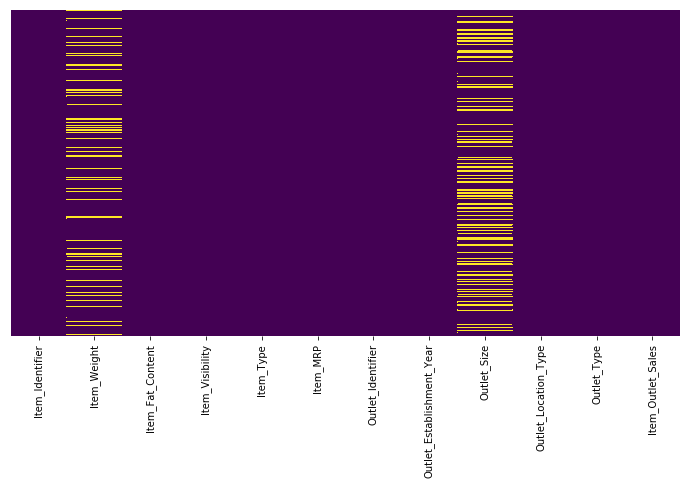

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
median = df['Item_Weight'].median()

df['Item_Weight'] = df['Item_Weight'].replace(np.nan, median)
df['Outlet_Size'] = df['Outlet_Size'].replace(np.nan, 'Missing')

In [14]:
# Doing data cleaning

In [15]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
fat_map = {'Low Fat':'Low Fat',
          'Regular':'Regular',
          'low fat':'Low Fat',
          'LF':'Low Fat',
          'reg':'Regular'}

In [17]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map(fat_map)

In [18]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [19]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [20]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

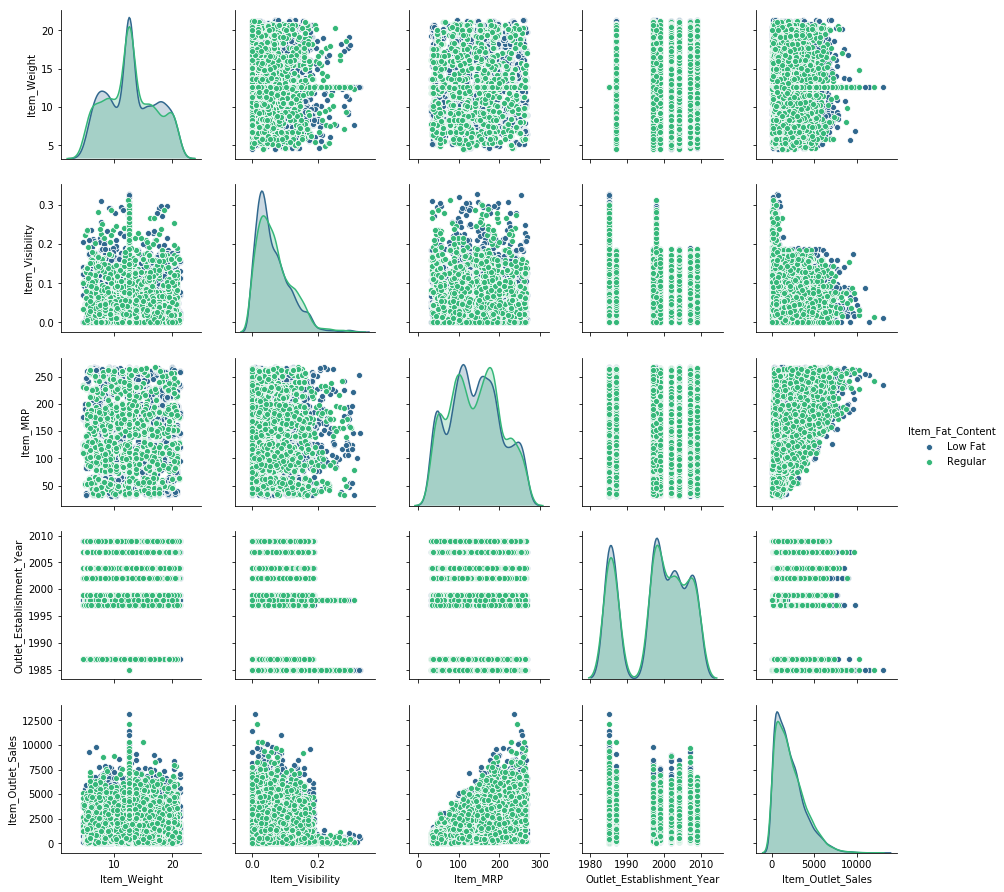

In [21]:
sns.pairplot(df, hue='Item_Fat_Content', palette='viridis')

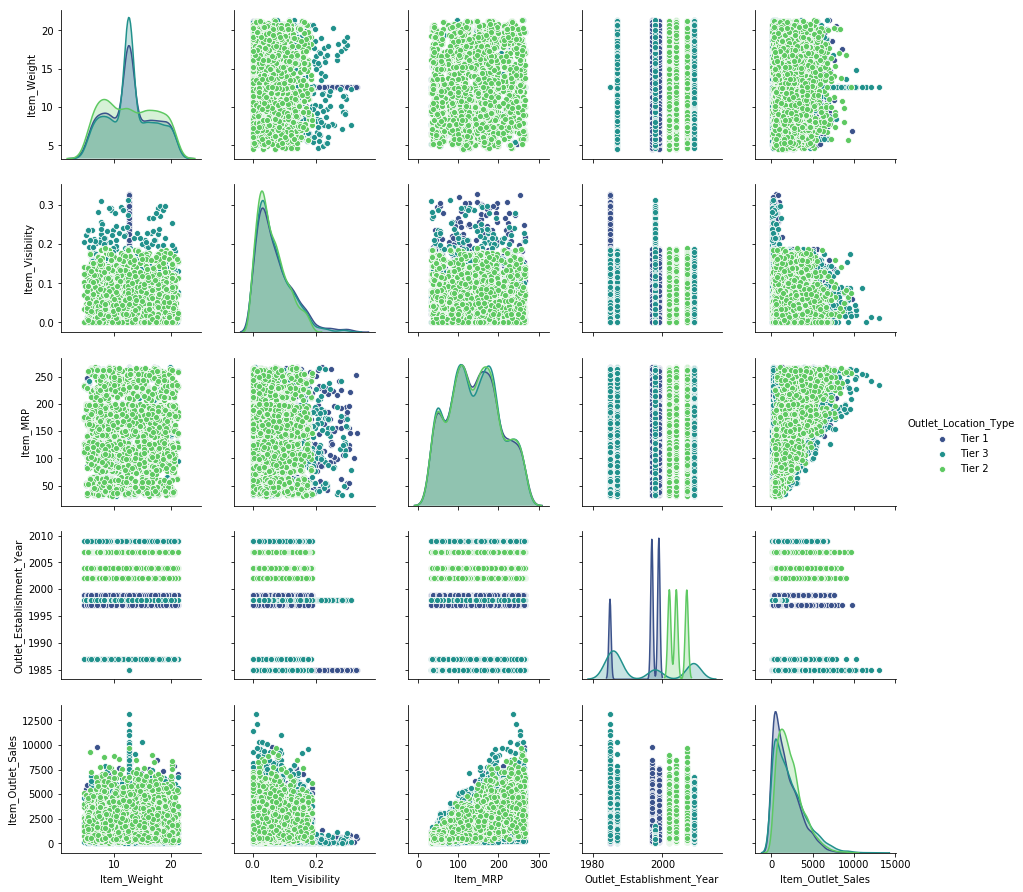

In [22]:
sns.pairplot(df, hue='Outlet_Location_Type', palette='viridis')

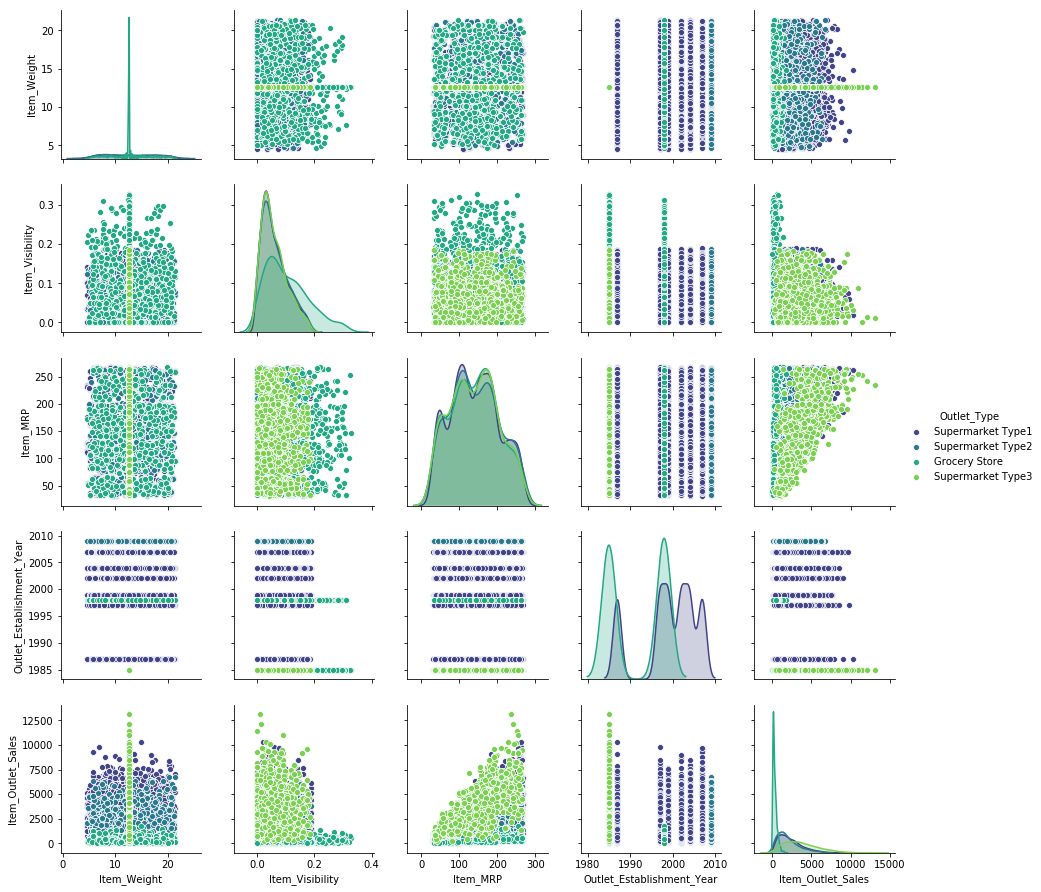

In [23]:
sns.pairplot(df, hue='Outlet_Type', palette='viridis')

In [24]:
# The item weight follows a Normal distribution
# The item visibility, item outlet sales and item MRP follows a skewed
# distribution so a different technique is going to be used to remove the outliers

In [25]:
# There is no relationship between the item visibility and the item outlet sales
# There is no relationship between the item weight and the item outlet sales
# There is a strong observable relationship between the Item MRP and the item outlet sales

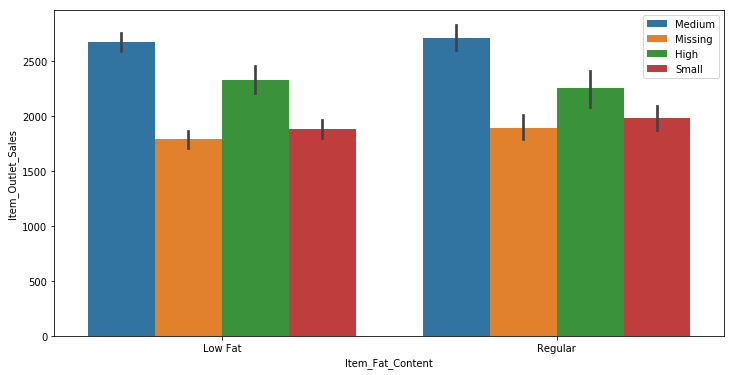

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, hue='Outlet_Size')
plt.legend(loc=0)

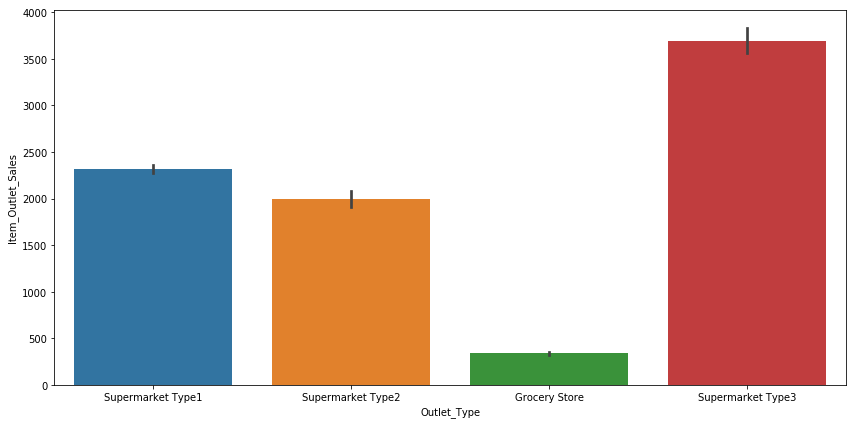

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.tight_layout()

In [28]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [29]:
init_notebook_mode(connected=True)

In [30]:
import plotly.graph_objs as go

In [31]:
import cufflinks as cf

In [32]:
cf.go_offline()

In [33]:
# Detecting Outliers

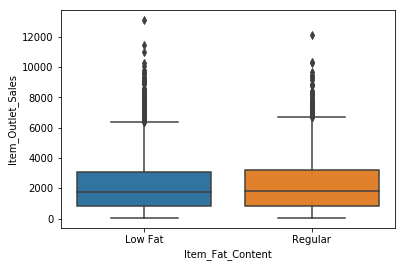

In [34]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

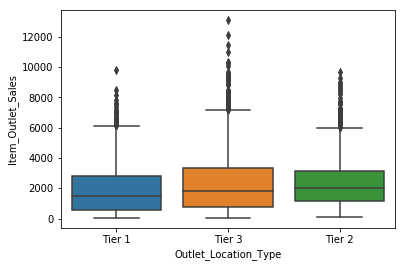

In [35]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)

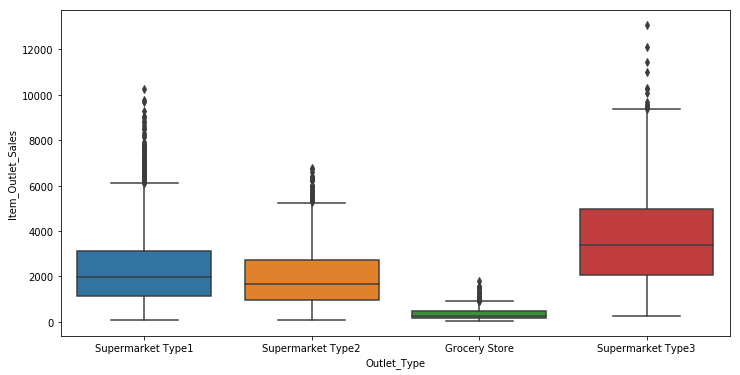

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)

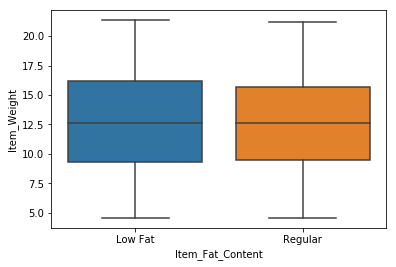

In [37]:
sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)

In [38]:
# As observed from the boxplot the Item weight feature contains no outliers

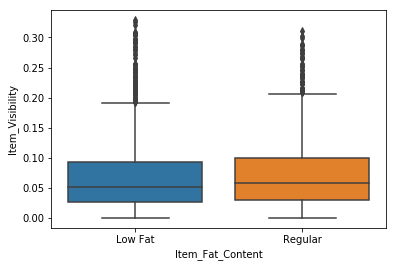

In [39]:
sns.boxplot(x='Item_Fat_Content', y='Item_Visibility', data=df)

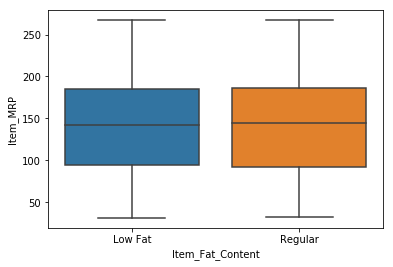

In [40]:
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=df)

In [41]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [42]:
def visibility_capping(value):
    mean = 0.066132
    Q1 = 0.026989
    Q3 = 0.094585
    IQR = Q3 - Q1
    lower_limit = mean - (1.5*IQR)
    upper_limit = mean + (1.5*IQR)
    if value < lower_limit:
        return lower_limit
    elif value > upper_limit:
        return upper_limit
    else:
        return value

In [43]:
# Eliminating the Outliers

In [44]:
df['Item_Visibility'] = df['Item_Visibility'].apply(visibility_capping)

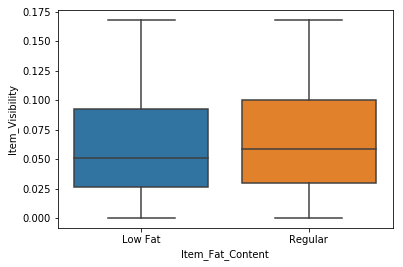

In [45]:
sns.boxplot(x='Item_Fat_Content', y='Item_Visibility', data=df)

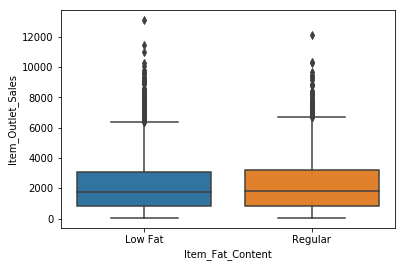

In [46]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

In [47]:
# Outliers have been removed successfully

In [48]:
# Categorical Variable Encoding
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()

In [50]:
enc = le.fit_transform(df['Item_Type'])

In [51]:
enc

array([ 4, 14, 10, ...,  8, 13, 14], dtype=int64)

In [52]:
enc = pd.DataFrame(enc,columns=['Item_Type'])

In [53]:
df = pd.concat([df,enc], axis=1)

In [54]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,4
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,10
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,6
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,9


In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
item_fat = pd.get_dummies(df['Item_Fat_Content'], drop_first=True)
outlet_size = pd.get_dummies(df['Outlet_Size'], drop_first=True)
outlet_loc = pd.get_dummies(df['Outlet_Location_Type'], drop_first=True)
outlet_type = pd.get_dummies(df['Outlet_Type'], drop_first=True)

In [57]:
df.drop(['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1, inplace=True)

In [58]:
df = pd.concat([df, item_fat, outlet_size, outlet_loc, outlet_type], axis=1)

In [59]:
# The item identifier feature adds no meaning to the objective

In [60]:
df.drop('Item_Identifier', axis=1, inplace=True)

In [61]:
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type,Regular,Medium,Missing,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,4,0,1,0,0,0,0,1,0,0
1,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,14,1,1,0,0,0,1,0,1,0
2,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,10,0,1,0,0,0,0,1,0,0
3,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,6,1,0,1,0,0,1,0,0,0
4,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,9,0,0,0,0,0,1,1,0,0


In [62]:
# The Dataset is ready for machine learning

In [63]:
df.drop('Outlet_Identifier', axis=1, inplace=True)

In [64]:
df.drop('Item_Type', axis=1, inplace=True)

In [65]:
df = pd.concat([df,enc], axis=1)

In [66]:
# Data has been thoroughly cleaned

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [68]:
lm = LinearRegression()

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
lm_pred = lm.predict(X_test)

In [73]:
dtree = DecisionTreeRegressor()

In [74]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [75]:
dtree_pred = dtree.predict(X_test)

In [76]:
rfc = RandomForestRegressor()

In [77]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
rfc_pred = rfc.predict(X_test)

In [79]:
gboost = GradientBoostingRegressor()

In [80]:
gboost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [81]:
gboost_pred = gboost.predict(X_test)

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [83]:
print('MAE:', mean_absolute_error(y_test,lm_pred))
print('MSE:', mean_squared_error(y_test,lm_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,lm_pred)))

MAE: 809.4115440780758
MSE: 1204624.762628951
RMSE: 1097.5539907580635


In [84]:
print('MAE:', mean_absolute_error(y_test,dtree_pred))
print('MSE:', mean_squared_error(y_test,dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,dtree_pred)))

MAE: 1075.3940670316777
MSE: 2433912.7298696195
RMSE: 1560.1002307126357


In [85]:
print('MAE:', mean_absolute_error(y_test,rfc_pred))
print('MSE:', mean_squared_error(y_test,rfc_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,rfc_pred)))

MAE: 802.4584313883456
MSE: 1357434.4480654364
RMSE: 1165.0898884057988


In [86]:
print('MAE:', mean_absolute_error(y_test,gboost_pred))
print('MSE:', mean_squared_error(y_test,gboost_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,gboost_pred)))

MAE: 754.2692811806261
MSE: 1144127.4001182187
RMSE: 1069.6389110901953


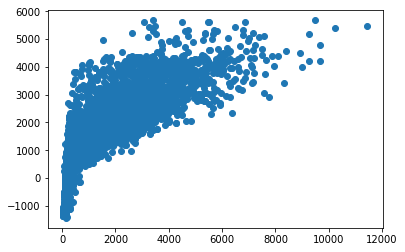

In [87]:
plt.scatter(y_test,lm_pred)

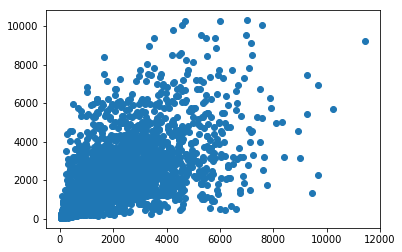

In [88]:
plt.scatter(y_test, dtree_pred)

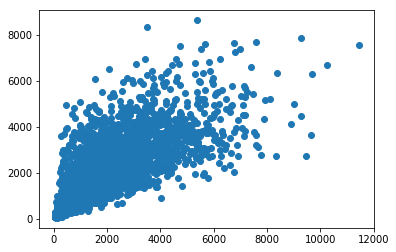

In [89]:
plt.scatter(y_test, rfc_pred)

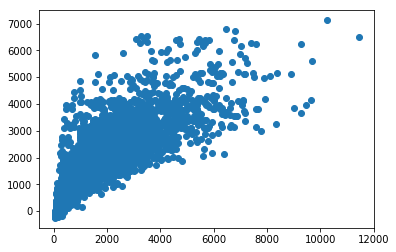

In [90]:
plt.scatter(y_test, gboost_pred)

In [91]:
test = pd.read_csv('Big Sales Mart Test.csv')

In [92]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [93]:
test2 = test.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

In [94]:
test2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [95]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [96]:
median = test['Item_Weight'].median()

test['Item_Weight'] = test['Item_Weight'].replace(np.nan, median)
test['Outlet_Size'] = test['Outlet_Size'].replace(np.nan, 'Missing')

In [97]:
fat_map = {'Low Fat':'Low Fat',
          'Regular':'Regular',
          'low fat':'Low Fat',
          'LF':'Low Fat',
          'reg':'Regular'}

In [98]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].map(fat_map)

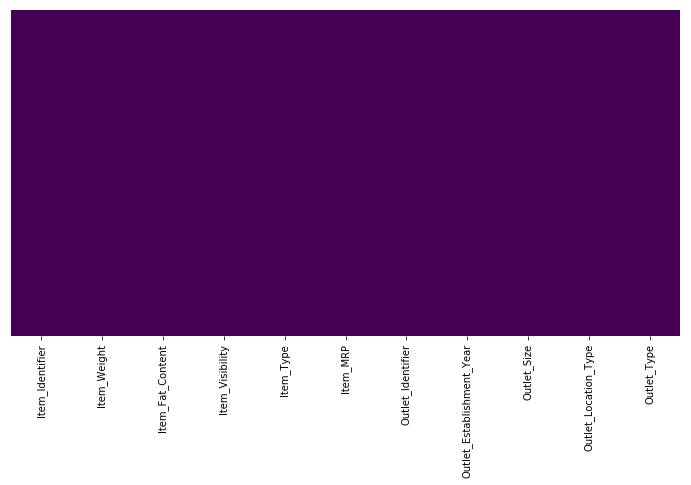

In [99]:
plt.figure(figsize=(12,6))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [100]:
enc = le.fit_transform(test['Item_Type'])

In [101]:
test.drop('Item_Type', axis=1, inplace=True)

In [102]:
enc = pd.DataFrame(enc, columns=['Item_Type'])

In [103]:
test = pd.concat([test,enc], axis=1)

In [104]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type
0,FDW58,20.750,Low Fat,0.007565,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,13
1,FDW14,8.300,Regular,0.038428,87.3198,OUT017,2007,Missing,Tier 2,Supermarket Type1,4
2,NCN55,14.600,Low Fat,0.099575,241.7538,OUT010,1998,Missing,Tier 3,Grocery Store,11
3,FDQ58,7.315,Low Fat,0.015388,155.0340,OUT017,2007,Missing,Tier 2,Supermarket Type1,13
4,FDY38,12.500,Regular,0.118599,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,4


In [105]:
item_fat = pd.get_dummies(test['Item_Fat_Content'], drop_first=True)
outlet_size = pd.get_dummies(test['Outlet_Size'], drop_first=True)
outlet_loc = pd.get_dummies(test['Outlet_Location_Type'], drop_first=True)
outlet_type = pd.get_dummies(test['Outlet_Type'], drop_first=True)

In [106]:
test.drop(['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1, inplace=True)

In [107]:
test = pd.concat([test,item_fat,outlet_size,outlet_loc,outlet_type], axis=1)

In [108]:
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Type,Regular,Medium,Missing,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,20.750,0.007565,107.8622,OUT049,1999,13,0,1,0,0,0,0,1,0,0
1,FDW14,8.300,0.038428,87.3198,OUT017,2007,4,1,0,1,0,1,0,1,0,0
2,NCN55,14.600,0.099575,241.7538,OUT010,1998,11,0,0,1,0,0,1,0,0,0
3,FDQ58,7.315,0.015388,155.0340,OUT017,2007,13,0,0,1,0,1,0,1,0,0
4,FDY38,12.500,0.118599,234.2300,OUT027,1985,4,1,1,0,0,0,1,0,0,1


In [109]:
final_test = test.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

In [110]:
final_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type,Regular,Medium,Missing,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750,0.007565,107.8622,1999,13,0,1,0,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,4,1,0,1,0,1,0,1,0,0
2,14.600,0.099575,241.7538,1998,11,0,0,1,0,0,1,0,0,0
3,7.315,0.015388,155.0340,2007,13,0,0,1,0,1,0,1,0,0
4,12.500,0.118599,234.2300,1985,4,1,1,0,0,0,1,0,0,1


In [111]:
test['Sales Predictions'] = gboost.predict(final_test)

In [112]:
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Type,Regular,Medium,Missing,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Sales Predictions
0,FDW58,20.750,0.007565,107.8622,OUT049,1999,13,0,1,0,0,0,0,1,0,0,301.919479
1,FDW14,8.300,0.038428,87.3198,OUT017,2007,4,1,0,1,0,1,0,1,0,0,1175.703193
2,NCN55,14.600,0.099575,241.7538,OUT010,1998,11,0,0,1,0,0,1,0,0,0,3803.465515
3,FDQ58,7.315,0.015388,155.0340,OUT017,2007,13,0,0,1,0,1,0,1,0,0,1308.948408
4,FDY38,12.500,0.118599,234.2300,OUT027,1985,4,1,1,0,0,0,1,0,0,1,3544.690211


In [115]:
final_df = test[['Item_Identifier','Outlet_Identifier','Sales Predictions']]

In [117]:
final_df.head()

,Item_Identifier,Outlet_Identifier,Sales Predictions
0,FDW58,OUT049,301.919479
1,FDW14,OUT017,1175.703193
2,NCN55,OUT010,3803.465515
3,FDQ58,OUT017,1308.948408
4,FDY38,OUT027,3544.690211


In [118]:
final_df.to_csv('Sales Prediction Submission', index=False)